In [15]:
import bangumi_request as br
import json
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json

In [ ]:
data = br.get_all_collections(username = "wakakap", subject_type=2, type=2, offsetmax=1151)
# 条目类型
# 1 = book
# 2 = anime
# 3 = music
# 4 = game
# 6 = real
# 类型
# 1: 想看
# 2: 看过
# 3: 在看
# 4: 搁置
# 5: 抛弃

当前偏移量: 0
使用的用户名: wakakap
请求URL: https://api.bgm.tv/v0/users/wakakap/collections
请求参数: subject_type=2, type=2, limit=50, offset=0
响应状态码: 200
获取到的数据量: 4
实际数据量: 50
当前偏移量: 50
使用的用户名: wakakap
请求URL: https://api.bgm.tv/v0/users/wakakap/collections
请求参数: subject_type=2, type=2, limit=50, offset=50
响应状态码: 200
获取到的数据量: 4
实际数据量: 50
当前偏移量: 100
使用的用户名: wakakap
请求URL: https://api.bgm.tv/v0/users/wakakap/collections
请求参数: subject_type=2, type=2, limit=50, offset=100
响应状态码: 200
获取到的数据量: 4
实际数据量: 50
当前偏移量: 150
使用的用户名: wakakap
请求URL: https://api.bgm.tv/v0/users/wakakap/collections
请求参数: subject_type=2, type=2, limit=50, offset=150
响应状态码: 200
获取到的数据量: 4
实际数据量: 50
当前偏移量: 200
使用的用户名: wakakap
请求URL: https://api.bgm.tv/v0/users/wakakap/collections
请求参数: subject_type=2, type=2, limit=50, offset=200
响应状态码: 200
获取到的数据量: 4
实际数据量: 50
当前偏移量: 250
使用的用户名: wakakap
请求URL: https://api.bgm.tv/v0/users/wakakap/collections
请求参数: subject_type=2, type=2, limit=50, offset=250
响应状态码: 200
获取到的数据量: 4
实际数据量: 50
当前偏移量: 300
使用的用户

In [27]:
# 保存 json 文件
file_path = 'bangumi/anime_seen/collections_seenanime_data.json'
with open(file_path, 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

### 数据粗略

In [28]:
file_path = 'bangumi/anime_seen/collections_seenanime_data.json'
def print_entry_info(entry):
    updated_at = entry.get('updated_at', 'N/A')
    comment = entry.get('comment', 'N/A')
    rate = entry.get('rate', 'N/A')
    tags = entry.get('tags', 'N/A')
    # subject
    subject = entry.get('subject', {})
    subject_name = subject.get('name', 'N/A')
    subject_score = subject.get('score', 'N/A')
    subject_tags = subject.get('tags', [])
    
    print(f"收藏时间: {updated_at}")
    print(f"作品名称: {subject_name}")
    print(f"我的评分: {rate}")
    print(f"网站评分: {subject_score}")
    print(f"评论: {comment}")
    # 获取前5个tag的name
    tag_names = ', '.join(tags)
    subject_tag_names = ', '.join([tag['name'] for tag in subject_tags[:5]])
    print(f"我的标签: {tag_names}")
    print(f"标签: {subject_tag_names}")

def print_basic_info(file_path, num_entries=3):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # 打印数据个数
    print(f"共有 {len(data)} 条数据")
    
    # 打印前 num_entries 条数据
    print(f"前 {num_entries} 条数据:")
    for entry in data[:num_entries]:
        print_entry_info(entry)
        print(f"---------")
    print(f".........")
    # 打印最后 num_entries 条数据
    print(f"最后 {num_entries} 条数据:")
    for entry in data[-num_entries:]:
        print_entry_info(entry)
        print(f"---")

print_basic_info(file_path, num_entries=2)

共有 1141 条数据
前 2 条数据:
收藏时间: 2025-01-21T19:29:08+08:00
作品名称: 義妹生活
我的评分: 7
网站评分: 7.3
评论: 何も言えない、ふうーー
我的标签: 2024
标签: 恋爱, 2024年7月, 轻小说改, 兄妹, 日常
---------
收藏时间: 2025-01-15T12:56:10+08:00
作品名称: がんばれ！くろーむ
我的评分: 0
网站评分: 5.2
评论: None
我的标签: 短片, 2024, ピノキオP, 上坂すみれ
标签: 短片, 原创, 2024, WEB, 日本
---------
.........
最后 2 条数据:
收藏时间: 2018-01-01T02:39:34+08:00
作品名称: Just Because!
我的评分: 7
网站评分: 7.3
评论: 虽然作画中偏下，但叙事很舒服，也很有代入感的青春恋爱。
我的标签: 2017, 小林敦, 原创, PINEJAM, 礒部花凜, 芳野由奈, Lynn, 千本木彩花, 貫井柚佳, 櫻庭有紗
标签: 恋爱, 原创, 校园, 2017年10月, 鸭志田一
---
收藏时间: 2018-01-01T02:38:54+08:00
作品名称: 宝石の国
我的评分: 8
网站评分: 7.7
评论: None
我的标签: 2017, 京極尚彦, 黒沢ともよ, 小松未可子, 茅野愛衣, 佐倉綾音, 田村睦心, 早見沙織, 内山夕実, 高垣彩陽, 内田真礼, 伊藤かな恵, 小澤亜李, 種﨑敦美, 茜屋日海夏, 広橋涼, 皆川純子, 能登麻美子, 釘宮理恵, 桑島法子, 原田彩楓, 上田麗奈, 斎藤千和, 三瓶由布子, 伊瀬茉莉也, 朴璐美, M・A・O
标签: 漫画改, 3D, 奇幻, 2017年10月, TV
---


### 显示tags的词云 可过滤

In [29]:
file_path = 'bangumi/anime_seen/collections_seenanime_data.json'
def filter_tags(tags, filter_list, include=False):
    if include:
        return [tag for tag in tags if tag in filter_list]
    else:
        return [tag for tag in tags if tag not in filter_list]

def count_tags(file_path, filter_list=None, include=False):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    sumtags = []
    for entry in data:
        tags = entry.get('tags', 'N/A')
        # subject
        subject = entry.get('subject', {})
        subject_tags = subject.get('tags', [])
        if filter_list is not None:
            tags = filter_tags(tags, filter_list, include)
            subject_tags = filter_tags([tag['name'] for tag in subject_tags], filter_list, include)
        sumtags.extend(tags)
        sumtags.extend(subject_tags)
    # 统计词频
    tag_counts = pd.Series(sumtags)
    return tag_counts

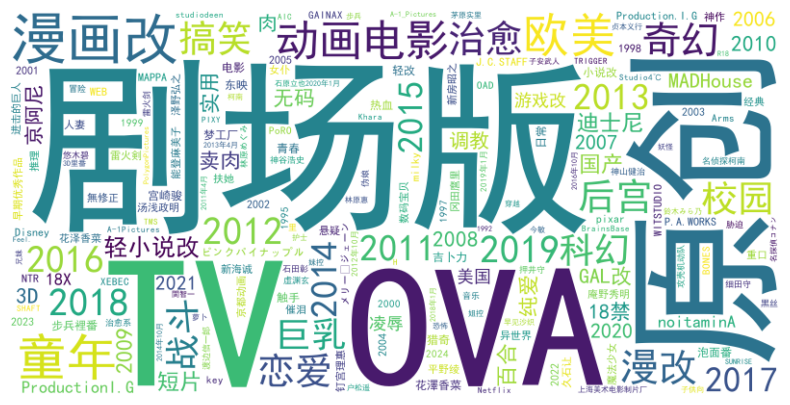

In [30]:
def cloud(file_path, filter_list=None, include=False):
    tag_counts = count_tags(file_path, filter_list, include)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='simhei.ttf').generate_from_frequencies(tag_counts.value_counts().to_dict())
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# 使用过滤列表生成词云
filter_list = ["里番", "肉番"]  
cloud(file_path, filter_list)

### 按每年分组的评分排序展示

In [33]:
import json
from collections import defaultdict
file_path = 'bangumi/anime_seen/collections_seenanime_data.json'
save_path = 'bangumi/anime_seen/sorted_anime_by_year.json'

def sort_anime_by_year(file_path, filter_list=None, min_rate=6):
    anime_by_year = defaultdict(list)# 创建一个字典来存储按年份分组的动画
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    for entry in data:
        subject = entry.get('subject', {})
        date = subject.get('date', '')# 提取日期
        # 检查格式
        if len(str(date).split('-')) < 2:
            date = "0000-00-00"
        year = str(date).split('-')[0]# 提取年份
        tags = entry.get('tags', 'N/A') # 提取我的标签
        rate = entry.get('rate', 0)# 提取我的评分

        # 过滤条件：包含不想要的标签或评分小于 min_rate
        if (filter_list is not None and set(tags) & set(filter_list)) or rate < min_rate:
            continue  

        if filter_list is not None:
            # 如果tags中和有filter_list中的标签，就跳过这个条目
            if set(tags) & set(filter_list):
                continue            
        anime_by_year[year].append(entry)
    
    # 对每个年份的动画按评分进行排序
    for year in anime_by_year:
        anime_by_year[year] = sorted(anime_by_year[year], key=lambda x: float(x.get('rate', 0)), reverse=True)
    # 按年份排序
    sorted_anime_by_year = dict(sorted(anime_by_year.items(), key=lambda x: x[0], reverse=True))
    return sorted_anime_by_year

def print_sorted_anime_by_year(sorted_anime_by_year):
    for year, animes in sorted_anime_by_year.items():
        anime_list = [f"{anime['subject']['name']}({anime['rate']})" for anime in animes]
        print(f"{year} , {','.join(anime_list)}")
        print('---')

def save_sorted_anime(sorted_anime_by_year, save_path):
    with open(save_path, 'w', encoding='utf-8') as f:
        json.dump(sorted_anime_by_year, f, ensure_ascii=False, indent=4)
    print(f"Sorted anime data saved to {save_path}")

animetag_filterlist = {'里番','肉番','短片'}
# 调用函数并打印结果
sorted_anime = sort_anime_by_year(file_path, filter_list=animetag_filterlist)
print_sorted_anime_by_year(sorted_anime)
save_sorted_anime(sorted_anime, save_path)

2024 , うずまき(8),君に届け 3RD SEASON(8),響け！ユーフォニアム３(8),ルックバック(8),義妹生活(7),じいさんばあさん若返る(7),らんま1/2(7),BEASTARS FINAL SEASON Part1(7),【推しの子】 第2期(7),夏目友人帳 漆(6)
---
2023 , 薬屋のひとりごと(8),葬送のフリーレン(8),進撃の巨人 The Final Season 完結編 後編(8),PLUTO(8),【推しの子】(8),アリスとテレスのまぼろし工場(7),魔法使いの嫁 SEASON2(7),天国大魔境(7),伊藤潤二『マニアック』(7),BURN THE WITCH #0.8(6),ミギとダリ(6),僕の心のヤバイやつ(6),スキップとローファー(6),大雪海のカイナ(6)
---
2022 , 攻殻機動隊 SAC_2045 シーズン2(8),四畳半タイムマシンブルース(8),進撃の巨人 The Final Season Part.2(8),夏へのトンネル、さよならの出口(7),よふかしのうた(7),すずめの戸締まり(7),であいもん(7),ぼっち・ざ・ろっく！(6),Cyberpunk: Edgerunners(6)
---
2021 , 漁港の肉子ちゃん(8),シドニアの騎士 あいつむぐほし(8),Sonny Boy -サニーボーイ-(8),ひぐらしのなく頃に 卒(8),オッドタクシー(8),無職転生 ～異世界行ったら本気だす～ 第2クール(7),見える子ちゃん(7),サイダーのように言葉が湧き上がる(7),イジらないで、長瀞さん(7),ゾンビランドサガ リベンジ(7),SSSS.DYNAZENON(7),BEASTARS 2nd Season(7),無職転生 ～異世界行ったら本気だす～(7),サマーゴースト(6),竜とそばかすの姫(6),クレヨンしんちゃん 謎メキ!花の天カス学園(6),小林さんちのメイドラゴンS(6),転生したらスライムだった件 第2期 2(6),ホリミヤ(6),転生したらスライムだった件 第2期(6)
---
2020 , 進撃の巨人 The Final Season(9),攻殻機動隊 SAC_2045(9),映像研には手を出すな！(8),マルルクちゃんの日常(7),どうにかなる日々(7),劇場

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 可过滤评分和显示数量
def print_sorted_anime_by_year_filter(sorted_anime_by_year, num_entries=5, min_rate=8.0):
    for year, animes in sorted_anime_by_year.items():
        filtered_animes = [anime for anime in animes if float(anime['rate']) >= min_rate]
        anime_list = [f"{anime['subject']['name']}({anime['rate']})" for anime in filtered_animes[:num_entries]]
        print(f"{year} , {','.join(anime_list)}")
        print('---')

print_sorted_anime_by_year_filter(sorted_anime, num_entries=5, min_rate=8.0)



2024 , うずまき(8),君に届け 3RD SEASON(8),響け！ユーフォニアム３(8),ルックバック(8)
---
2023 , 薬屋のひとりごと(8),葬送のフリーレン(8),進撃の巨人 The Final Season 完結編 後編(8),PLUTO(8),【推しの子】(8)
---
2022 , 攻殻機動隊 SAC_2045 シーズン2(8),四畳半タイムマシンブルース(8),進撃の巨人 The Final Season Part.2(8)
---
2021 , 漁港の肉子ちゃん(8),シドニアの騎士 あいつむぐほし(8),Sonny Boy -サニーボーイ-(8),ひぐらしのなく頃に 卒(8),オッドタクシー(8)
---
2020 , 進撃の巨人 The Final Season(9),攻殻機動隊 SAC_2045(9),映像研には手を出すな！(8)
---
2019 , 進撃の巨人 Season 3 Part.2(9),彼方のアストラ(8),劇場版 響け！ユーフォニアム～誓いのフィナーレ～(8),センコロール コネクト(8),PSYCHO-PASS サイコパス Sinners of the System Case.3 恩讐の彼方に＿＿(8)
---
2018 , GODZILLA 星を喰う者(9),DEVILMAN crybaby(9),未来のミライ(8),ペンギン・ハイウェイ(8),リズと青い鳥(8)
---
2017 , ブレードランナー ブラックアウト 2022(8),サクラダリセット(8),夜は短し歩けよ乙女(8),虐殺器官(8),大护法(8)
---
2016 , 終末のイゼッタ(8),キズナイーバー(8),暗殺教室 第2期(8),この世界の片隅に(8),僕だけがいない街(8)
---
2015 , シドニアの騎士 第九惑星戦役(8),蟲師 特別編「鈴の雫」(8),デス・パレード(8),花とアリス 殺人事件(8),百日紅 ～Miss HOKUSAI～(8)
---
2014 , 進撃の巨人 悔いなき選択 OAD(8),SHIROBAKO(8),蟲師 続章(8),蟲師 続章 第2クール(8),思い出のマーニー(8)
---
2013 , かぐや姫の物語(9),進撃の巨人 OAD(8),キルラキル(8),風立ちぬ(8),デス・ビリヤード(

In [35]:
# 打印显示图像
from collections import Counter

def print_anime_density(sorted_anime, min_rate=8.0):
    years = []
    for year, animes in sorted_anime.items():
        filtered_animes = [anime for anime in animes if float(anime['rate']) >= min_rate]
        years.extend([year] * len(filtered_animes))

    # 将年份转换为整数并排除年份为0的数据
    years = [int(year) for year in years if year.isdigit() and int(year) != 0]
    # 统计每年的数量
    year_counts = Counter(years)

    # 打印密度图，年份从大到小排序
    for year in sorted(year_counts, reverse=True):
        bar = '|' * year_counts[year]  # 用竖线表示每部作品
        print(f"{year}: {bar}")

# 调用函数
print_anime_density(sorted_anime, min_rate=8.0)


2024: ||||
2023: |||||
2022: |||
2021: |||||
2020: |||
2019: ||||||||
2018: ||||||
2017: |||||||||||
2016: |||||
2015: |||||||||
2014: ||||||||||
2013: |||||||||
2012: ||||||||
2011: |||||||||||||
2010: |||||
2009: ||||||||
2008: ||||||
2007: ||||||
2006: |||||||||
2005: ||
2004: |||||||
2003: |
2002: ||||
2001: |||||||
2000: ||
1999: ||
1998: ||||
1997: ||||
1995: ||||
1994: |
1993: |
1992: |
1991: |
1989: |
1988: ||
1986: |
1984: ||
1983: |
1979: |
1973: |


## 下载所有图片

In [ ]:
import os
import requests
import re
import json
from pathlib import Path

# 文件路径（替换为你的实际路径）
path = 'bangumi/anime_seen/sorted_anime_by_year.json'

# 创建image文件夹（如果不存在）
output_dir = "bangumi/anime_seen/image"
Path(output_dir).mkdir(exist_ok=True)

# 定义非法文件名字符的正则表达式
illegal_chars = r'[<>:"/\\|?*]'

# 下载图片的函数
def download_image(url, filename):
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # 检查请求是否成功
        with open(filename, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        # print(f"成功下载: {filename}")
    except requests.RequestException as e:
        print(f"下载失败 {filename}: {e}")

# 过滤函数：判断是否跳过某个作品
def should_skip(item):
    # 检查评分 (rate)
    rate = item.get("rate")  # 使用 get() 以防 rate 字段缺失
    if rate is None or rate < 6:
        # print(f"跳过 {item['subject']['name']} (ID: {item['subject_id']})：评分 {rate} 低于6或未评分")
        return True
    
    # 检查 tags
    tags = item.get("tags", [])  # 使用 get() 以防 tags 字段缺失，默认空列表
    skip_tags = {'里番', '肉番', '短片'}  # 需要跳过的标签集合
    for tag in tags:
        if tag in skip_tags:
            # print(f"跳过 {item['subject']['name']} (ID: {item['subject_id']})：包含禁用标签 '{tag}'")
            return True
    
    return False

# 从文件加载JSON数据
try:
    with open(path, 'r', encoding='utf-8') as f:
        data = json.load(f)
except FileNotFoundError:
    print(f"错误：文件 {path} 未找到")
    exit(1)
except json.JSONDecodeError:
    print(f"错误：文件 {path} 不是有效的JSON格式")
    exit(1)

# 处理JSON数据并下载图片
for year in data:
    for item in year:
    # 应用过滤
        if should_skip(item):
            continue
        
        subject = item["subject"]
        name = subject["name"]
        subject_id = subject["id"]
        image_url = subject["images"]["common"]
        
        # 清理文件名中的非法字符
        clean_name = re.sub(illegal_chars, '', name)
        
        # 拼接文件名
        filename = f"{clean_name}_{subject_id}_common.jpg"
        filepath = os.path.join(output_dir, filename)
        
        # 检查文件是否已存在
        if os.path.exists(filepath):
            # print(f"文件已存在，跳过: {filename}")
            continue

        # 下载图片
        download_image(image_url, filepath)

print("所有图片下载完成！")

所有图片下载完成！
